In [188]:
%%time
# Loads all the pre-processing library files.
import pickle
exec(pickle.load(open('/content/PREPROCESSORS.pkl', 'rb'))['#include'])
%matplotlib inline

CPU times: user 35.7 ms, sys: 2.96 ms, total: 38.6 ms
Wall time: 46.2 ms


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


##Reading and loading the data from the data sets


In [189]:
%%time
# Loading the raw data relates to the fake news detection for the purpose of training the model.
# The training dataset in about 80% of the overall data.
trainingData = pd.read_excel("/content/NewsTrainingDataSet.xlsx")
# Loading the raw data relates to the fake news detection for the purpose of testing the model.
# The testing data is 20% of the overall data.
testingData = pd.read_excel("/content/NewsTestingDataSet.xlsx")
# Loading the raw data into the pandas framework so that it will be easy for us to work on the tabeled data.
# Printing the shape of the data present in the training and testing data sets.
print(f"Magnitude of the training data : {trainingData.shape[0]} rows & {trainingData.shape[1]} cols")
print(f"Magnitude of the testing data : {testingData.shape[0]} rows & {testingData.shape[1]} cols")

Magnitude of the training data : 6420 rows & 3 cols
Magnitude of the testing data : 2140 rows & 3 cols
CPU times: user 583 ms, sys: 8.66 ms, total: 592 ms
Wall time: 591 ms


In [190]:
# Re-writing the labeled data under the new column as 0 for real and 1 for fake.
trainingData['TRAINING_LABEL'] = np.where(trainingData['label']=='real', 0,  1)
trainingData.head(5)

,id,tweet,label,TRAINING_LABEL
0,1,The CDC currently reports 99031 deaths. In gen...,real,0
1,2,States reported 1121 deaths a small rise from ...,real,0
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake,1
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real,0
4,5,Populous states can generate large case counts...,real,0


In [191]:
trainingData.tail(5)

,id,tweet,label,TRAINING_LABEL
6415,6416,A tiger tested positive for COVID-19 please st...,fake,1
6416,6417,???Autopsies prove that COVID-19 is??� a blood...,fake,1
6417,6418,_A post claims a COVID-19 vaccine has already ...,fake,1
6418,6419,Aamir Khan Donate 250 Cr. In PM Relief Cares Fund,fake,1
6419,6420,It has been 93 days since the last case of COV...,real,0


In [192]:
# Re-writing the labeled data under the new column as 0 for real and 1 for fake.
testingData['TESTING_LABEL'] = np.where(testingData['label']=='real', 0,  1)
testingData.head(5)

,id,tweet,label,TESTING_LABEL
0,1,Chinese converting to Islam after realising th...,fake,1
1,2,11 out of 13 people (from the Diamond Princess...,fake,1
2,3,"COVID-19 Is Caused By A Bacterium, Not Virus A...",fake,1
3,4,Mike Pence in RNC speech praises Donald Trump’...,fake,1
4,5,6/10 Sky's @EdConwaySky explains the latest #C...,real,0


In [193]:
testingData.tail(5)

,id,tweet,label,TESTING_LABEL
2135,2136,Donald Trump wrongly claimed that New Zealand ...,fake,1
2136,2137,Current understanding is #COVID19 spreads most...,real,0
2137,2138,Nothing screams “I am sat around doing fuck al...,fake,1
2138,2139,Birx says COVID-19 outbreak not under control ...,fake,1
2139,2140,Another 4422 new coronavirus cases have been c...,real,0


Distribution in Training Data


<Axes: >

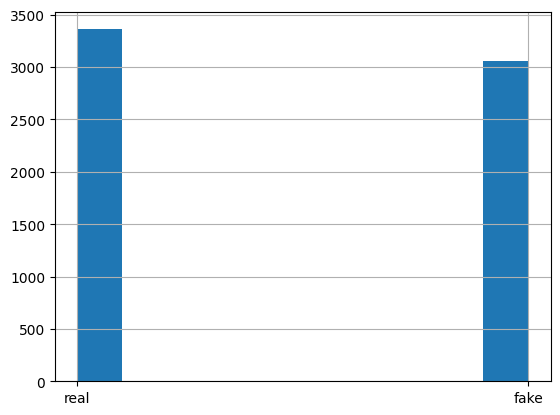

In [194]:
# Training data distribution.
print('Distribution in Training Data')
df = pd.DataFrame(trainingData)
df['label'].hist()

Distribution in Testing Data


<Axes: >

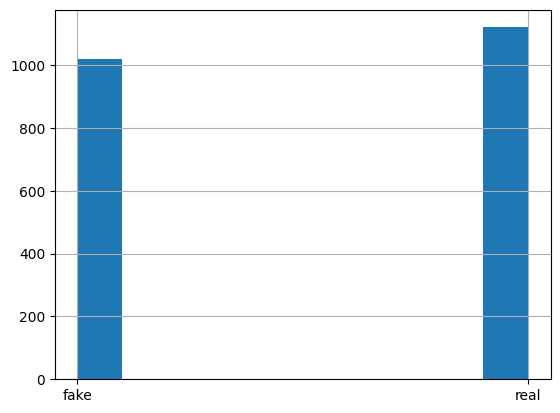

In [195]:
# Testing data distribution.
print('Distribution in Testing Data')
df = pd.DataFrame(testingData)
df['label'].hist()

#Program Essentials

In [196]:
import seaborn as sb
import matplotlib.pyplot as plt

class BinaryLabels:
  # A class that has the function getClassLabels which returs the class names [Real, Fake].
  CLASS_LABELS = ['real', 'fake']
  def getClassLabels(self):
    return self.CLASS_LABELS

class TermFrequency:
  real = dict()
  fake = dict()

class Statistics:
  # All the statistics will be stored in these class variables, which can be used later in the code.
  totalWords = []
  docsInClass = []
  totalUniqueWords = []

class tabulateData:
  # Tabulates the data using the pandas framework.
  def tab(self, **kwargs):
    return pd.DataFrame.from_dict(kwargs)

class visualizer:
  # The class visualizer helps to visualize the text data using graphics.

  def visualize(self, figSize, data, LABEL1, LABEL2):
    # Generates a bar graph
    plt.figure(figsize=figSize)
    axis = plt.subplot()
    sb.barplot(data=data, x='Class', y='Values', hue='Category')
    axis.set_xlabel('Class')
    axis.set_title('Data Statistics')
    axis.xaxis.set_ticklabels([LABEL1, LABEL2])

  def generateConfusionMatrix(self, figSize, cMat, labels):
    # Generates confusion matrix.
    plt.figure(figsize=figSize)
    axis = plt.subplot()
    sb.heatmap(cMat, annot=True, fmt="d", cmap='Blues', ax = axis)
    axis.set_xlabel('Predicted labels')
    axis.set_ylabel('True labels')
    axis.set_title('Confusion Matrix')
    axis.xaxis.set_ticklabels(labels, rotation=45)
    axis.yaxis.set_ticklabels(labels, rotation=45)
    axis.xaxis.tick_top()

  def generateHeatmap(self, figSize, data, labels, ticklabels, Ylabel, title):
    # Generates heat map.
    plt.figure(figsize = figSize)
    axis = plt.subplot()
    axis.set_ylabel(Ylabel)
    sb.heatmap(data.iloc[:,0:3], annot=True, fmt="d", linewidths = 1, linecolor = 'Grey', cmap = 'Blues', ax = axis)
    axis.set_title(title)
    axis.xaxis.set_ticklabels(ticklabels, rotation=40)
    axis.xaxis.tick_top()
    axis.yaxis.set_ticklabels(labels, rotation=0)

  def showDistribution(self, N, X, Xlab, Ylab, title):
    # Visualizes distribution.
    plt.bar(N, X, width=10)
    plt.xlabel(Xlab)
    plt.ylabel(Ylab)
    plt.title(title)
    plt.show()
    plt.title('Length-Frequency Curve Distribution')
    plt.xlabel(Xlab)
    plt.ylabel(Ylab)
    plt.plot(N, X)
    plt.show()

  def buildWordCloud(self, text):
    # Builds a word cloud on given data.
    plt.imshow(WordCloud(background_color='white').generate(text), interpolation='bilinear')
    plt.axis("off")
    plt.show()

  def generateHighestTermFreq(self, figSize, class_, color):
    # Generates graph that shows higest term frequency.
    fig = plt.figure(figsize = figSize)
    plt.bar([tf[0][0] for tf in class_][0: int(class_.__len__()/10)], [tf[1] for tf in class_][0: int(class_.__len__()/10)], color = color, width = 2)
    plt.xlabel("Terms")
    plt.ylabel("Term-Frequency")
    plt.title("Terms ordered by highest frequency")
    plt.show()

  def generatePie(self, tDocs, tWrds, Uwrds, label):
    # Generates a pie chart.
    slice = [tDocs, tWrds, Uwrds]
    activities = ['Documents','Words', 'Unique words']
    plt.title(f'Data inferences from class {label.upper()}')
    cols = ['b','g','y']
    plt.pie(slice,
    labels =activities,
    colors = cols,
    startangle = 90,
    shadow = False,
    explode =(0,0.1,0),
    autopct ='%1.1f%%')
    plt.show()

  def generateCmpGraph(self, labels, legends, accuracy, precision, recall, f1score, dropout):
    # Generates a comparision graph.
    plt.plot(labels, accuracy, color='b')
    plt.plot(labels, np.array(precision) - dropout, color='g')
    plt.plot(labels, np.array(recall) - dropout, color='y')
    plt.plot(labels, np.array(f1score) - dropout, color='r')
    plt.legend(legends, loc='upper left')
    plt.show()

class Summary:
  # Prints the summary of the data.
  def head(self, mylist):
    data = []
    for term, freq in sorted(mylist.items(), key= lambda item: item[1],reverse = True)[:10]:
      data.append(str(term)+" : "+str(freq))
    return data

class IntegerEncoder:
  # Encodes words into integers.
  def getEncodedSequence(self, Index, cleanedNews, sequences):
    print(f"\nEncoded Sequences\nFound {Index.__len__()} unique tokens")
    idx = 0
    print("-"*25)
    for word in cleanedNews[5].split():
      print(f"{word}    \t: {sequences[5][idx]}")
      idx += 1
    print("-"*25)

  def getPaddedSequence(self, cleanedNews, corpus):
    print("\nPadded Sequences:\n", cleanedNews[5],"\n",corpus[5])

class dataSpec:
  maxWords = 10000
  padLen = 50
  def maxWordLen(self):
    return self.maxWords
  def paddingLength(self):
    return self.padLen

class Training:
  def callBack(self):
    '''
    callBack: This function defines a custom callback class (callBack) that inherits from keras.callbacks.Callback.
    The on_epoch_end method of this class is overridden to check if the accuracy during training surpasses a predefined threshold (THRESHOLD).
    If the accuracy exceeds this threshold, the training is halted by setting self.model.stop_training to True.
    The purpose is to stop training early if a certain accuracy level is achieved.
    '''
    keras.backend.clear_session()
    THRESHOLD = .999
    class callBack(keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > THRESHOLD):
          print("\nReached %2.2f%% accuracy thus halting trianing" % (THRESHOLD * 100))
          self.model.stop_training = True
    return callBack()

  def tensorBoard(self):
    '''
    tensorBoard: This function sets up and returns a TensorBoard callback.
    TensorBoard is a visualization tool provided with TensorFlow that allows monitoring and visualizing various aspects of model training,
    such as loss and accuracy over time.
    The function generates a directory for TensorBoard logs based on the current date and time.
    '''
    %load_ext tensorboard
    directory = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks.TensorBoard(directory, histogram_freq=1)

  def save(self):
    '''
    This function sets up and returns a ModelCheckpoint callback. The ModelCheckpoint callback is used to save the model's weights during training.
    It monitors the validation accuracy (val_accuracy) and saves the model's weights to a file (CNNBiLSMT_Model.h5) when the validation accuracy is maximized.
    This is helpful for later loading the best weights of the model for inference.
    '''
    file = "f.h5"
    save = keras.callbacks.ModelCheckpoint(file, monitor='val_accuracy', verbose=2, save_best_only=True, save_weights_only=False, mode='max')
    return save


class Model:
  def generateModel(self, dimension):
    '''
    This function creates a sequential model using Keras.
    The model consists of the following layers:
    Embedding: This layer is used for word embedding. It converts positive integers (indexes) into dense vectors of fixed size.
    Convolutional: This is a 1D convolutional layer with 128 filters and a filter size of 8. The activation function used is Rectified Linear Unit (ReLU).
    Bidirectional: This layer creates a bidirectional wrapper for the LSTM layer, allowing the model to capture information from both past and future time steps.
    LSTM: Long Short-Term Memory layer with 32 units and a dropout rate of 0.2 for regularization.
    Flatten: This layer flattens the output from the Bidirectional LSTM layer.
    Dense: The final dense layer with 2 units (for binary classification) and softmax activation.
    '''
    LAYERS = {
        'Embedding': keras.layers.Embedding(dataSpec().maxWordLen(), dimension, input_length = dataSpec().paddingLength()),
        'CNN' : keras.layers.Conv1D(128, 8, activation='relu'),
        'BiLSTM' : keras.layers.Bidirectional(LSTM(32, dropout=0.15)),
        'Flatten' : keras.layers.Flatten(),
        'Dense' : keras.layers.Dense(len(BinaryLabels().getClassLabels()), activation = 'softmax')
    }
    keras.backend.clear_session()
    model = keras.models.Sequential([LAYERS['Embedding'], LAYERS['CNN'], LAYERS['BiLSTM'], LAYERS['Flatten'], LAYERS['Dense']])
    '''
    This function compiles the model using the Adam optimizer, sparse categorical crossentropy as the loss function (suitable for integer labels),
    and accuracy as the metric to monitor during training.
    '''
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
    model.summary()
    return model

  def visualizeModel(self, model):
    '''
    This function uses the plot_model utility from tensorflow.keras.utils to generate a visualization of the model architecture.
    The visualization is saved to a file named "model.png".
    '''
    tensorflow.keras.utils.plot_model(model, to_file = 'model.png', show_shapes = True, show_layer_names = True)

class Results:
   performance = {
      'CNN+BiLSTM' : {
          'Accuracy' : 0,
          'Precision' : 0,
          'Recall' : 0,
          'f1Score' : 0
      },
       'LSTM' : {
          'Accuracy' : 0,
          'Precision' : 0,
          'Recall' : 0,
          'f1Score' : 0
      },
      'Decision Tree' : {
          'Accuracy' : 0,
          'Precision' : 0,
          'Recall' : 0,
          'f1Score' : 0
      },
       'Logistic Regression' : {
          'Accuracy' : 0,
          'Precision' : 0,
          'Recall' : 0,
          'f1Score' : 0
      },
      'Random Forest' : {
          'Accuracy' : 0,
          'Precision' : 0,
          'Recall' : 0,
          'f1Score' : 0
      },
      'Naive Bayes' : {
          'Accuracy' : 0,
          'Precision' : 0,
          'Recall' : 0,
          'f1Score' : 0
      },
      'cVec+Tfidf+lSVC' : {
          'Accuracy' : 0,
          'Precision' : 0,
          'Recall' : 0,
          'f1Score' : 0
      }
   }
   def update(self, name, ACCURACY, RECALL, PRECISION, F1SCORE):
    self.performance[str(name)]['Accuracy'] = ACCURACY
    self.performance[str(name)]['Recall'] = RECALL
    self.performance[str(name)]['Precision'] = PRECISION
    self.performance[str(name)]['f1Score'] = F1SCORE

class ClassLevelInferences:
    REAL = {
      'Total Documents' : 0,
      'Total words' : 0,
      'Unique words': 0
    }

    FAKE = {
      'Total Documents' : 0,
      'Total words' : 0,
      'Unique words': 0
    }


class MachineLearning:
  '''
  MachineLearning Class: The class has class-level variables accuracy_, precision, recall, and f1Score to store evaluation metrics for multiple models.
  efficiency Method: This method takes a machine learning model (ml_model), test data (X_test and Y_test), and a model name (model) as input.
  It prints the model's name, confusion matrix, and classification report (precision, recall, and F1-score).
  It calculates and appends accuracy, precision, recall, and F1-score to the class-level lists.
  '''
  def efficiency(self, ml_model, X_test, Y_test, model):
    print("-"*60)
    print("Classifier: ", model)
    pred_Y = ml_model.predict(X_test)
    print(f'Confusion Matrix:\n {confusion_matrix(Y_test, pred_Y)}')
    visualizer().generateConfusionMatrix((6,4), confusion_matrix(Y_test, pred_Y), BinaryLabels().getClassLabels())
    print('REPORT : ')
    print(classification_report(Y_test, pred_Y))
    ACCURACY = (round(accuracy_score(Y_test, pred_Y),4) * 100)
    PRECISION = (round(precision_score(Y_test, pred_Y, average='weighted'), 4) * 100)
    RECALL = (round(recall_score(Y_test, pred_Y, average='weighted'), 4) * 100)
    F1SCORE = (round(f1_score(Y_test, pred_Y, average='weighted'), 4) * 100)

    if model == 'Logistic Regression':
      Results().update(model, ACCURACY, RECALL, PRECISION, F1SCORE)
    elif model == 'Decision Tree':
      Results().update(model, ACCURACY, RECALL, PRECISION, F1SCORE)
    elif model == 'Random Forest':
      Results().update(model, ACCURACY, RECALL, PRECISION, F1SCORE)
    elif model == 'Naive Bayes':
      Results().update(model, ACCURACY, RECALL, PRECISION, F1SCORE)
    elif model == 'LSTM':
      Results().update(model, ACCURACY, RECALL, PRECISION, F1SCORE)

##Data pre-processing

In [197]:
%%time
class dataPreprocessor:
  # Pre-processin the data, removing all the Unified resouce locators from the news.
  # And also removing the special symbols from the data if present.
  # Converting the data into lower case characters.
  # The data will be cleaned and will be stored back into respective new cells.

  def lowerCase(self, data):
    # Converts all the characters into lower case letters.
    return data.lower()

  def filterURL(self, data):
    # Removes the URLs from the text.
    return re.sub(r'(?:(https|http)\s?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', '', data, flags=re.MULTILINE)

  def filterWs(self, data):
    # Removes the unwanted white spaces from the text.
    return data.replace('\n','')

  def filterSs(self, data):
    # Removes the special symbols from the text.
    filtered_data = ''.join(letter for letter in data if letter.isalnum() or letter == ' ')
    return filtered_data

  def filterKeyWords(self, data):
    keywords = ['2019', '19', 'covid19', 'cases', 'case', 'covid 19', 'corona', 'virus', 'coronavirus', 'covid']
    pData = ''
    for word in data.split():
      if word not in keywords:
        pData += word + ' '
    data = pData.strip()
    return data

  def filterStopWords(self, data):
    words = data.split()
    cleanedData = [word for word in words if word not in pickle.load(open('/content/stopword.pkl', 'rb'))['stopWords']]
    return ' '.join(cleanedData)

  def lemmetizationFilter(self, data):
    words = data.split()
    lem = WordNetLemmatizer()
    tokens = [lem.lemmatize(word) for word in words]
    return ' '.join(tokens)

  def dataCleansing(self, data):
      url_filter = self.filterURL(data)
      lwr_cs = self.lowerCase(url_filter)
      rmWhts = self.filterWs(lwr_cs)
      ss_filter = self.filterSs(rmWhts)
      kw_filter = self.filterKeyWords(ss_filter)
      sw_filter = self.filterStopWords(kw_filter)
      lm_filter = self.lemmetizationFilter(sw_filter)
      return lm_filter


# Applying the data cleansing method on the news and defining another column to store them safely.
trainingData['cleaned'] = trainingData['tweet'].apply(dataPreprocessor().dataCleansing)
testingData['cleaned'] = testingData['tweet'].apply(dataPreprocessor().dataCleansing)

CPU times: user 6.75 s, sys: 1.29 s, total: 8.03 s
Wall time: 8.14 s


In [125]:
trainingData.head(5)

,id,tweet,label,TRAINING_LABEL,cleaned
0,1,The CDC currently reports 99031 deaths. In gen...,real,0,cdc currently report 99031 death general discr...
1,2,States reported 1121 deaths a small rise from ...,real,0,state reported 1121 death small rise last tues...
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake,1,politically correct woman almost us pandemic e...
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real,0,indiafightscorona 1524 testing laboratory indi...
4,5,Populous states can generate large case counts...,real,0,populous state generate large count look new p...


In [126]:
trainingData.tail(5)

,id,tweet,label,TRAINING_LABEL,cleaned
6415,6416,A tiger tested positive for COVID-19 please st...,fake,1,tiger tested positive please stay away pet bird
6416,6417,???Autopsies prove that COVID-19 is??� a blood...,fake,1,autopsy prove blood clot pneumonia ought fough...
6417,6418,_A post claims a COVID-19 vaccine has already ...,fake,1,post claim vaccine already developed cause wid...
6418,6419,Aamir Khan Donate 250 Cr. In PM Relief Cares Fund,fake,1,aamir khan donate 250 cr pm relief care fund
6419,6420,It has been 93 days since the last case of COV...,real,0,93 day since last acquired locally unknown sou...


In [127]:
testingData.head(5)

,id,tweet,label,TESTING_LABEL,cleaned
0,1,Chinese converting to Islam after realising th...,fake,1,chinese converting islam realising muslim affe...
1,2,11 out of 13 people (from the Diamond Princess...,fake,1,11 13 people diamond princess cruise ship inti...
2,3,"COVID-19 Is Caused By A Bacterium, Not Virus A...",fake,1,caused bacterium treated aspirin
3,4,Mike Pence in RNC speech praises Donald Trump’...,fake,1,mike penny rnc speech praise donald trump seam...
4,5,6/10 Sky's @EdConwaySky explains the latest #C...,real,0,610 sky edconwaysky explains latest data gover...


In [128]:
testingData.tail(5)

,id,tweet,label,TESTING_LABEL,cleaned
2135,2136,Donald Trump wrongly claimed that New Zealand ...,fake,1,donald trump wrongly claimed new zealand big s...
2136,2137,Current understanding is #COVID19 spreads most...,real,0,current understanding spread mostly person per...
2137,2138,Nothing screams “I am sat around doing fuck al...,fake,1,nothing scream sat around fuck lockdown quite ...
2138,2139,Birx says COVID-19 outbreak not under control ...,fake,1,birx say outbreak control people move
2139,2140,Another 4422 new coronavirus cases have been c...,real,0,another 4422 new confirmed uk highest daily nu...


## Getting insights of the data


Total number of words in the class REAL : 60825
Total number of unique words in the class REAL : 9283
Total number of Documents in the class REAL : 3360
Most frequent terms in the class REAL: ['new', 'test', 'state', 'number', 'death', 'total', 'confirmed', 'people', 'reported', 'amp']



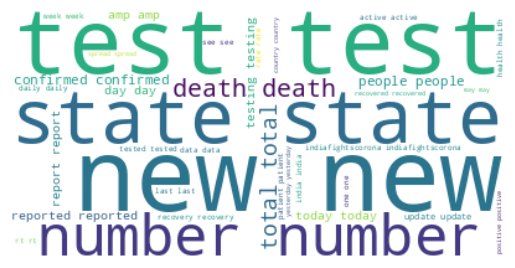

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
Total number of words in the class FAKE : 37946
Total number of unique words in the class FAKE : 9075
Total number of Documents in the class FAKE : 3060
Most frequent terms in the class FAKE: ['people', 'claim', 'trump', 'say', 'vaccine', 'pandemic', 'new', 'india', 'video', 'hospital']



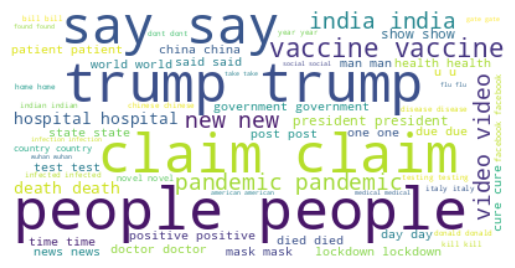

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------+


In [198]:
class Insights(Statistics):
  # Trying to get the insights of the data by breaking it down and understanding the statestics of the data. The method frequency helps us in doing so.
  # This method specifies the total number of words with respect to the class [REAL or FAKE].
  # This method specifies the total number of unique words with respect to the class [REAL or FAKE].
  # This method specifies the total number of Documents with respect to the class [REAL or FAKE].
  # Most frequent terms with respect to the class [REAL or FAKE].
  def frequency(self, _class_):
    # The _class_ here refers to whether it is a REAL news or a FAKE news only in the training data set.
    # We are trying to fetch the data with respect to the class.
    for label in _class_:
      words = []
      # trainingData[trainingData.label == label specifies whether we are refering to REAL class or FAKE class.
      for news in list(trainingData[trainingData.label == label].cleaned):
        for word in news.strip().split():
          # Fetching all the words in the class.
          words.append(word)
      self.totalWords.append(words.__len__())
      # Calculating the frequency of the terms.
      freq = dict()
      for word in words:
        freq[word] = freq.get(word, 0) + 1
        # Updates with 0 if its has not found any word.
      # Total number of unique words will be given by using this code.
      text = ""
      for term, frequency in freq.items():
        text += ((term+" ") * frequency)
      self.totalUniqueWords.append(np.unique(words).__len__())
      # Calculating the document term frequency.
      TermFrequency().real.update(freq) if label == 'real' else TermFrequency().fake.update(freq)
      self.docsInClass.append(list(trainingData[trainingData.label == label].cleaned).__len__())
      print(f"Total number of words in the class {label.upper()} : {words.__len__()}\nTotal number of unique words in the class {label.upper()} : {(np.unique(words)).__len__()}\nTotal number of Documents in the class {label.upper()} : {(list(trainingData[trainingData.label==label].cleaned)).__len__()}\nMost frequent terms in the class {label.upper()}: {[word[0] for word in sorted(freq.items(), key= lambda term: term[1],reverse = True)[:10]]}\n")
      if(label == 'real'):
        ClassLevelInferences().REAL['Total Documents'] = int((list(trainingData[trainingData.label==label].cleaned)).__len__())
        ClassLevelInferences().REAL['Total words'] = int(words.__len__())
        ClassLevelInferences().REAL['Unique words'] = int((np.unique(words)).__len__())
      else:
        ClassLevelInferences().FAKE['Total Documents'] = int((list(trainingData[trainingData.label==label].cleaned)).__len__())
        ClassLevelInferences().FAKE['Total words'] = int(words.__len__())
        ClassLevelInferences().FAKE['Unique words'] = int((np.unique(words)).__len__())
      # Builds a word cloud to represent the frequency of the term. i.e Term-Freq
      visualizer().buildWordCloud(text)
      print("+"+('-'*170)+"+")
    return self.totalWords, self.totalUniqueWords, self.docsInClass

words, unique_words, documents = Insights().frequency(BinaryLabels().getClassLabels())

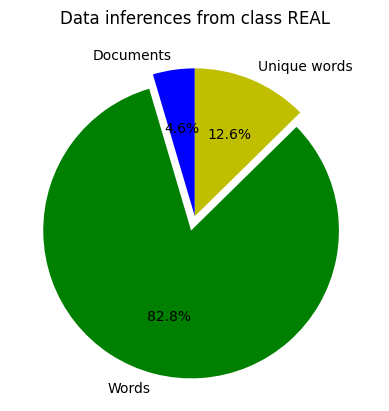

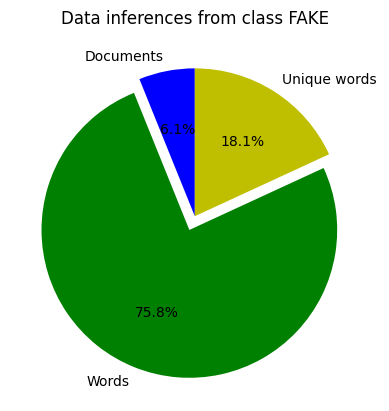

In [130]:
# Getting inferences from both the classes for better interpretation of the data.
data = ClassLevelInferences().REAL
visualizer().generatePie(data['Total Documents'], data['Total words'], data['Unique words'], 'real')
data = ClassLevelInferences().FAKE
visualizer().generatePie(data['Total Documents'], data['Total words'], data['Unique words'], 'fake')

Highest Term Frequency in class : REAL


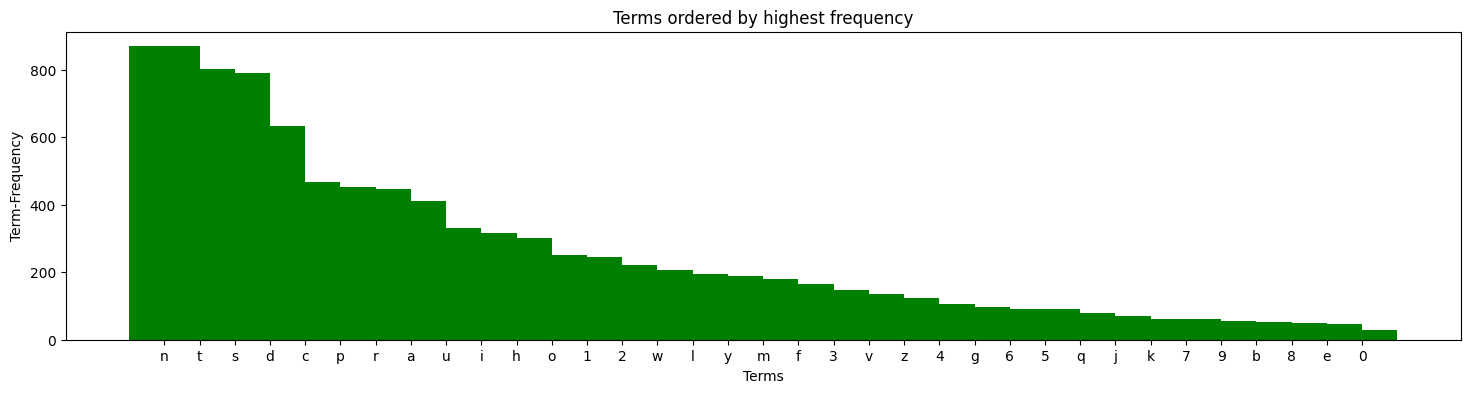


Highest Term Frequency in class : FAKE


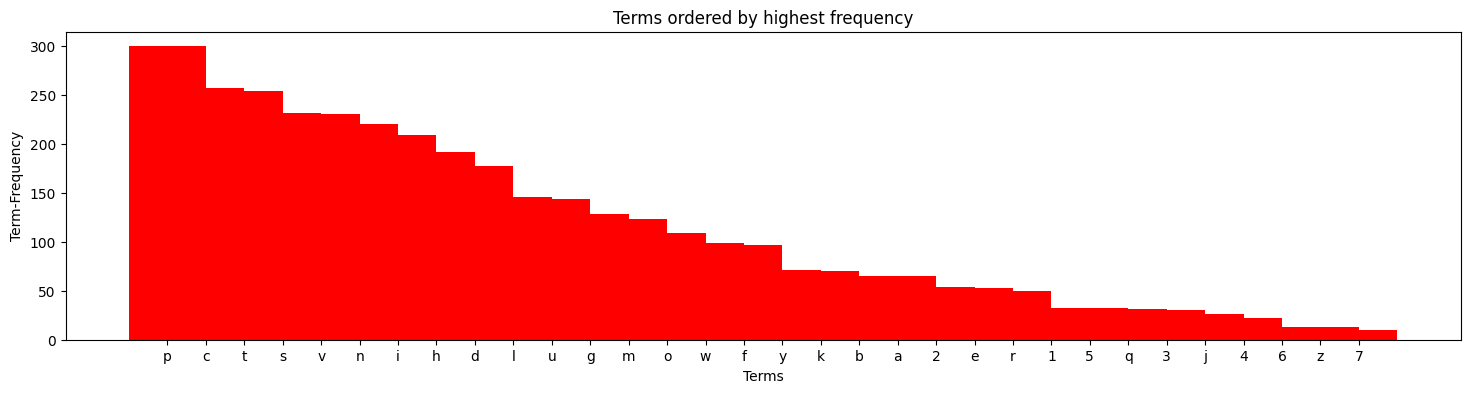

In [131]:
tf_ = TermFrequency()
print('Highest Term Frequency in class : REAL')
real = [word for word in sorted(tf_.real.items(), key= lambda term: term[1],reverse = True)]
visualizer().generateHighestTermFreq((18,4), real, 'green')

print('\nHighest Term Frequency in class : FAKE')
fake = [word for word in sorted(tf_.fake.items(), key= lambda term: term[1],reverse = True)]
visualizer().generateHighestTermFreq((18,4), fake, 'red')

In [132]:
# Loading the data into the pandas framework for generating graphs for better visualization.
data = tabulateData().tab(Documents=documents,Words=words,UniqueWords=unique_words,Class= BinaryLabels().getClassLabels())
data

,Documents,Words,UniqueWords,Class
0,3360,60825,9283,real
1,3060,37946,9075,fake


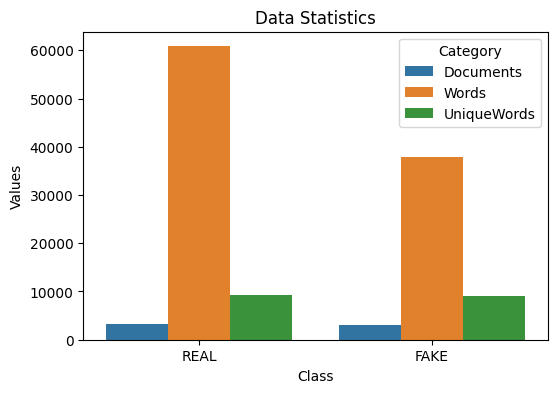

In [133]:
# To visualize the data.
# Just converting the data into the tabular form using pandans so that we will be able
# to generate a bar graph that represents Docs, Words, Unique words in both the classes.
visualizer().visualize((6,4), pd.melt(data, id_vars = "Class", var_name = "Category", value_name ="Values"), BinaryLabels().getClassLabels()[0].upper(),BinaryLabels().getClassLabels()[1].upper())

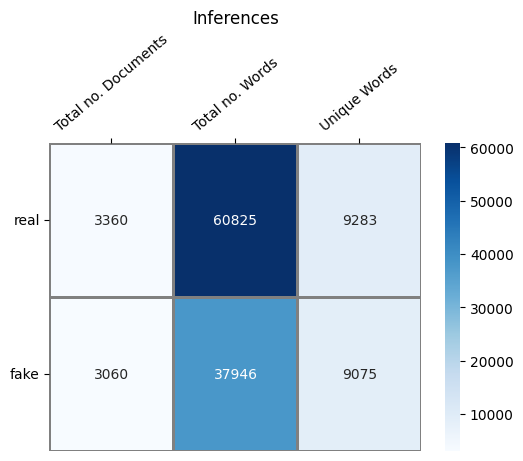

In [134]:
# Using the libraries for generating a heatmap, which helps us to understand the data in a better way.
visualizer().generateHeatmap((6,4),data,BinaryLabels().getClassLabels(),["Total no. Documents", "Total no. Words", "Unique Words"],'Classes','Inferences')

[(0, 2), (1, 8), (2, 25), (3, 89), (4, 137), (5, 203), (6, 297), (7, 304), (8, 396), (9, 349), (10, 352), (11, 300), (12, 285), (13, 274), (14, 239)]
This specifies the length of 'n' news posts are present 'x' times - (n, x)


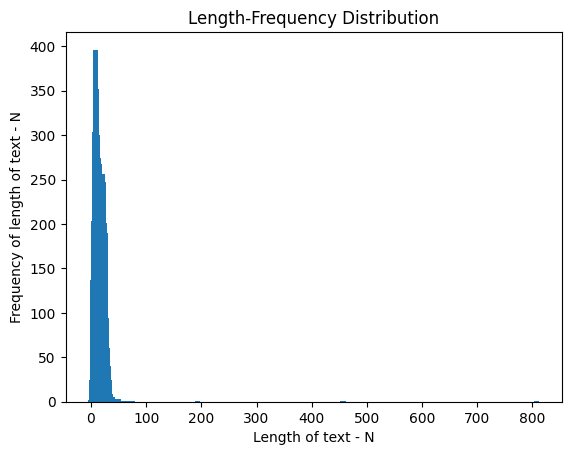

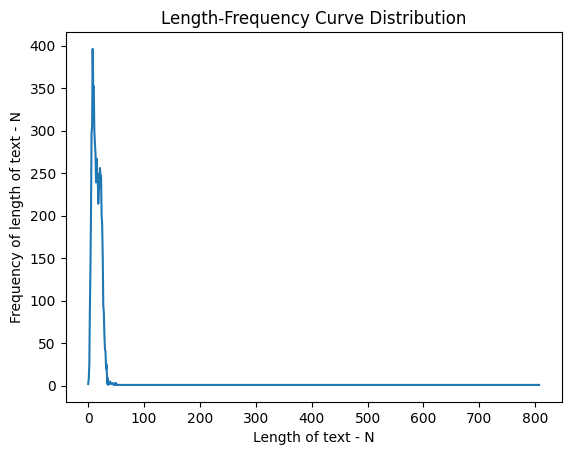

In [135]:
# Calculating the N,X i.e., the frequency X of the term length N in each of the classes.
freq_ = dict()
for news in trainingData['cleaned']:
  # Grabbing the data from the cleaned column.
  newsLen = (news.split()).__len__()
  freq_[newsLen] = freq_.get(newsLen, 0) + 1
freq_ = sorted(freq_.items(), key= lambda term: term[0])
print(freq_[:15])
print("This specifies the length of 'n' news posts are present 'x' times - (n, x)")
# Just to visualize the Length-Freq distribution.
N = []
X = []
for n, x in freq_:
  N.append(n)
  X.append(x)
visualizer().showDistribution(N, X, 'Length of text - N','Frequency of length of text - N', 'Length-Frequency Distribution')

In [199]:
'''
This function encode takes a list of cleaned news articles (cleanedNews), corresponding binary labels (binaryLabels),
maximum number of words to consider (maxWords), and the desired padding length (padding).
The function uses the Tokenizer class from the tensorflow.keras.preprocessing.text module to tokenize and encode the text data.
The Tokenizer is fitted on the provided cleaned news data, and the function then prints an analysis of the tokenization information,
including term frequency, word document frequency, word indexes, and total documents.
The function converts the cleaned news text into sequences of integers using the trained tokenizer.
It also prints information about the encoded sequences, including unique tokens and a sample of the encoded values for words in the 5th news article.
Finally, the function pads the sequences to a specified length using keras.preprocessing.sequence.pad_sequences.
The padded sequences, binary labels, and the trained tokenizer are returned from the function.
'''
def encode(cleanedNews, binaryLabels, maxWords, padding):
  tokenizer = Tokenizer(num_words = maxWords, filters = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-', split = ' ', char_level = False, oov_token = None, document_count = 0)
  tokenizer.fit_on_texts(cleanedNews)
  print("Analysis of the information provided by the Tokenizer")
  print(f"\nTERM FREQUENCY : {Summary().head(tokenizer.word_counts)}\nWORD DOCUMENT FREQ : {Summary().head(tokenizer.word_docs)}\nWORD INDEXES : {Summary().head(tokenizer.word_index)}\nTOTAL DOCS : {tokenizer.document_count}")
  sequences = tokenizer.texts_to_sequences(cleanedNews)
  IntegerEncoder().getEncodedSequence(tokenizer.word_index, cleanedNews, sequences)
  corpus = keras.preprocessing.sequence.pad_sequences(sequences, value=0.0, padding='post', maxlen = padding)
  IntegerEncoder().getPaddedSequence(cleanedNews, corpus)
  return corpus, binaryLabels, tokenizer

training_data, training_labels, tokenizer = encode(trainingData.cleaned, trainingData.TRAINING_LABEL, dataSpec().maxWordLen(), dataSpec().paddingLength())

Analysis of the information provided by the Tokenizer

TERM FREQUENCY : ['new : 1090', 'test : 948', 'state : 924', 'death : 810', 'people : 753', 'number : 701', 'total : 545', 'confirmed : 515', 'india : 514', 'day : 493']
WORD DOCUMENT FREQ : ['new : 913', 'state : 731', 'test : 665', 'death : 650', 'people : 641', 'number : 551', 'total : 460', 'india : 441', 'day : 415', 'confirmed : 412']
WORD INDEXES : ['infertility : 15227', 'dargah : 15226', 'intubate : 15225', 'repandybiggsaz : 15224', 'rickleventhal : 15223', 'ashley : 15222', 'charliekirk11 : 15221', 'daveman19802 : 15220', 'kagashley : 15219', 'reserved : 15218']
TOTAL DOCS : 6420

Encoded Sequences
Found 15227 unique tokens
-------------------------
act    	: 359
found    	: 168
average    	: 116
person    	: 122
illinois    	: 1390
infecting    	: 1391
111    	: 1981
people    	: 5
data    	: 29
show    	: 33
infection    	: 68
growth    	: 1392
rate    	: 30
declined    	: 1300
time    	: 35
factor    	: 1023
stayathome

In [200]:
print('Training Data: ')
print(training_data)
print('\nTraining Labels:')
print(training_labels)

Training Data: 
[[  63  192   15 ...    0    0    0]
 [   3   11 6717 ...    0    0    0]
 [4604 1637  183 ...    0    0    0]
 ...
 [ 106   34   17 ...    0    0    0]
 [2639  846 2527 ...    0    0    0]
 [2093   10   67 ...    0    0    0]]

Training Labels:
0       0
1       0
2       1
3       0
4       0
       ..
6415    1
6416    1
6417    1
6418    1
6419    0
Name: TRAINING_LABEL, Length: 6420, dtype: int64


In [201]:
# CNN + BiLSTM
%%time
def defineModel():
    Dimensions = 50
    _model_ = Model()
    model = _model_.generateModel(Dimensions)
    _model_.visualizeModel(model)
    return model
'''
The defineModel function initializes an input dimension variable 'Dimensions' with a value of 50,
then generates and visualizes a neural network model using the functions defined earlier.
Finally, it returns the compiled model.
At last returned model to the variable CNN_BiLSTM.
'''
if os.path.isfile('/content/CNNBiLSMT_Model.h5'):
  print(f"The model has already been trained with the highest accuracy of {pickle.load(open('model.pkl','rb'))['accuracy']} % previously.\nDo you want to re-train the model ?\n")
  command = input('Press (Y/N):')
  if(len(command) != 0):
    if command == 'y' or command == 'yes':
      '''
      Calls the fit method on a Keras model (CNN_BiLSTM) with training data (training_data) and labels (training_labels).
      Specifies training parameters such as the number of epochs (100),
      batch size (128), verbosity level (1),
      validation split (15%), and the list of callbacks (listOfCallBacks).
      '''
      CNN_BiLSTM = defineModel()
      CNNBiLSTM = CNN_BiLSTM.fit(training_data, training_labels, epochs = 100, batch_size = 128, verbose = 1, validation_split = 0.15, callbacks = [Training().callBack(), Training().save(), Training().tensorBoard()])
    else:
      import tensorflow as tf
      CNN_BiLSTM = tf.keras.models.load_model('/content/CNNBiLSMT_Model.h5')
      CNN_BiLSTM.summary()
      print('The previous model has been loaded successfully!!')
else:
  print('The model is not present in the directory, please upload it and run this cell again.\nIf you dont have the model then you can click on Y to generate a new model.')
  command = input('Press (Y/N):')
  if(len(command) != 0):
    if command == 'y' or command == 'yes':
      '''
      Calls the fit method on a Keras model (CNN_BiLSTM) with training data (training_data) and labels (traininng_labels).
      Specifies training parameters such as the number of epochs (100),
      batch size (128), verbosity level (1),
      validation split (15%), and the list of callbacks (listOfCallBacks).
      '''
      CNN_BiLSTM = defineModel()
      CNNBiLSTM = CNN_BiLSTM.fit(training_data, training_labels, epochs = 100, batch_size = 128, verbose = 1, validation_split = 0.15, callbacks = [Training().callBack(), Training().save(), Training().tensorBoard()])
  else:
    print('Re-run the cell')

The model is not present in the directory, please upload it and run this cell again.
If you dont have the model then you can click on Y to generate a new model.
Press (Y/N):y
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            500000    
                                                                 
 conv1d (Conv1D)             (None, 43, 128)           51328     
                                                                 
 bidirectional (Bidirection  (None, 64)                41216     
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 2)                 130       
             

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


43/43 [==============================] - 10s 133ms/step - loss: 0.5076 - accuracy: 0.7510 - val_loss: 0.3241 - val_accuracy: 0.8712
Epoch 2/100
43/43 [==============================] - ETA: 0s - loss: 0.1878 - accuracy: 0.9304
Epoch 2: val_accuracy improved from 0.87124 to 0.90862, saving model to CNNBiLSMT_Model.h5
43/43 [==============================] - 5s 107ms/step - loss: 0.1878 - accuracy: 0.9304 - val_loss: 0.2270 - val_accuracy: 0.9086
Epoch 3/100
43/43 [==============================] - ETA: 0s - loss: 0.0701 - accuracy: 0.9758
Epoch 3: val_accuracy improved from 0.90862 to 0.92004, saving model to CNNBiLSMT_Model.h5
43/43 [==============================] - 4s 93ms/step - loss: 0.0701 - accuracy: 0.9758 - val_loss: 0.2556 - val_accuracy: 0.9200
Epoch 4/100
43/43 [==============================] - ETA: 0s - loss: 0.0270 - accuracy: 0.9919
Epoch 4: val_accuracy did not improve from 0.92004
43/43 [==============================] - 3s 63ms/step - loss: 0.0270 - accuracy: 0.9919 -

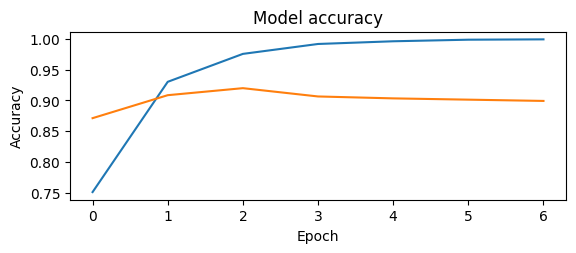

In [202]:
# Please run this cell, only in the case of new generated model, if you are using a pre-trained model then this graph will not be shown.
# Model accuracy representation.
plt.subplot(2, 1, 1)
plt.plot(CNNBiLSTM.history['accuracy'])
plt.plot(CNNBiLSTM.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

## Model validation


In [203]:
import tensorflow as tf
class CNNBiLSTM():
  # Helps the user to know if the given news is fake or real.
  def textProcessor(self, data):
    processor = dataPreprocessor()
    url_filter_ = processor.filterURL(data)
    lwr_cs_ = processor.lowerCase(url_filter_)
    rmWhts_ = processor.filterWs(lwr_cs_)
    processedData = processor.filterSs(rmWhts_)
    return processedData

  def predict(self, news):
    # Loading the model
    news = self.textProcessor(news)
    news = news.lower()
    tokenizer = Tokenizer(num_words = 50, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-',split=' ', char_level=False, oov_token=None, document_count=0)
    tokenizer.fit_on_texts([news])
    return 'real' if np.argmax(CNN_BiLSTM.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([news]), value=0.0, padding='post', maxlen = 50)), axis = -1) == 0 else 'fake'

In [204]:
TEXT = 'covid act now found on average each person in illinois with covid19 is infecting 111 other people data shows that the infection growth rate has declined over time this factors in the stayathome order and other restrictions put in place'
print(f'It is a {CNNBiLSTM().predict(TEXT).upper()} news')

1/1 [==============================] - 1s 629ms/step
It is a REAL news


# Prediction on testing data


In [214]:
print(f"Magnitude of the testing data set : {len(testingData)}")
testingData['TESTING_LABEL']= testingData.label.replace({'real':0,'fake':1})
testingData['cleaned'] = testingData['tweet'].apply(dataPreprocessor().dataCleansing)
testingData.head(5)

Magnitude of the testing data set : 2140


,id,tweet,label,TESTING_LABEL,cleaned
0,1,Chinese converting to Islam after realising th...,fake,1,chinese converting islam realising muslim affe...
1,2,11 out of 13 people (from the Diamond Princess...,fake,1,11 13 people diamond princess cruise ship inti...
2,3,"COVID-19 Is Caused By A Bacterium, Not Virus A...",fake,1,caused bacterium treated aspirin
3,4,Mike Pence in RNC speech praises Donald Trump’...,fake,1,mike penny rnc speech praise donald trump seam...
4,5,6/10 Sky's @EdConwaySky explains the latest #C...,real,0,610 sky edconwaysky explains latest data gover...


In [215]:
testingData.tail(5)

,id,tweet,label,TESTING_LABEL,cleaned
2135,2136,Donald Trump wrongly claimed that New Zealand ...,fake,1,donald trump wrongly claimed new zealand big s...
2136,2137,Current understanding is #COVID19 spreads most...,real,0,current understanding spread mostly person per...
2137,2138,Nothing screams “I am sat around doing fuck al...,fake,1,nothing scream sat around fuck lockdown quite ...
2138,2139,Birx says COVID-19 outbreak not under control ...,fake,1,birx say outbreak control people move
2139,2140,Another 4422 new coronavirus cases have been c...,real,0,another 4422 new confirmed uk highest daily nu...


In [216]:
'''
keras.preprocessing.sequence.pad_sequences:
This function is used to pad sequences (in this case, tokenized text sequences) to ensure that they all have the same length.
tokenizer.texts_to_sequences(testData.cleaned): Converts text sequences in the cleaned column of testData using the previously trained tokenizer.
pad_sequences(..., value=0.0, padding='post', maxlen=dataSpec().paddingLength()): Pads the sequences with zeros (value=0.0) to the specified length (maxlen=dataSpec().paddingLength()). Padding is added at the end of each sequence (padding='post').
'''
test_data = keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences(testingData.cleaned), value=0.0, padding='post', maxlen= dataSpec().paddingLength())
test_labels = testingData['TESTING_LABEL']
print('Testing data:')
print(test_data)
print('\nTesting labels:')
print(test_labels)

Testing data:
[[ 221 9991 4147 ...    0    0    0]
 [ 396  558    5 ...    0    0    0]
 [ 351 2357  806 ...    0    0    0]
 ...
 [1282 7927 3409 ...    0    0    0]
 [  22   79  334 ...    0    0    0]
 [ 239    1    8 ...    0    0    0]]

Testing labels:
0       1
1       1
2       1
3       1
4       0
       ..
2135    1
2136    0
2137    1
2138    1
2139    0
Name: TESTING_LABEL, Length: 2140, dtype: int64


In [217]:
loss, accuracy = CNN_BiLSTM.evaluate(test_data, test_labels)
'''
This line evaluates the model on the test dataset (test_data and test_labels) using the evaluate method.
It returns the loss and accuracy on the test dataset.
'''
print('\nLOSS   \t\t: '+ str(loss)+'\nACCURACY \t: '+ str(accuracy)+'\n')
file = open('model.pkl','wb')
file.write(pickle.dumps({'accuracy' : str(accuracy * 100)}))
file.close()
probability = CNN_BiLSTM.predict(test_data)
'''
Predicts the probabilities for each class using the trained model on the test dataset.
'''
print('\nPROBABILITY: ')
print(probability)
predictionClass = np.argmax(probability, axis = -1)
'''
Predicts the class with the highest probability for each instance in the test dataset.
The np.argmax function is used to find the index of the maximum value along the specified
axis (axis=-1 corresponds to the last dimension, which represents the classes).
'''
print('\nPrediction : '.upper(), end="")
print(predictionClass)
print([('real' if pred == 0 else 'fake') for pred in predictionClass][0:10])

67/67 [==============================] - 0s 5ms/step - loss: 0.4138 - accuracy: 0.9042

LOSS   		: 0.41383519768714905
ACCURACY 	: 0.9042056202888489

67/67 [==============================] - 0s 4ms/step

PROBABILITY: 
[[2.9129398e-04 9.9970871e-01]
 [9.9959666e-01 4.0331850e-04]
 [3.0268816e-04 9.9969733e-01]
 ...
 [9.9276294e-05 9.9990070e-01]
 [9.9820578e-01 1.7941581e-03]
 [9.9980325e-01 1.9677165e-04]]

PREDICTION : [1 0 1 ... 1 0 0]
['fake', 'real', 'fake', 'fake', 'real', 'fake', 'real', 'real', 'fake', 'fake']


67/67 [==============================] - 0s 4ms/step
Confusion Matrix:[[1011  109]
 [  96  924]]

Report : 
[[1011  109]
 [  96  924]]
Over all model performance:


,Accuracy,Precision,Recall,F1 Score
CNN + BiLSTM,90.42,90.43,90.42,90.42


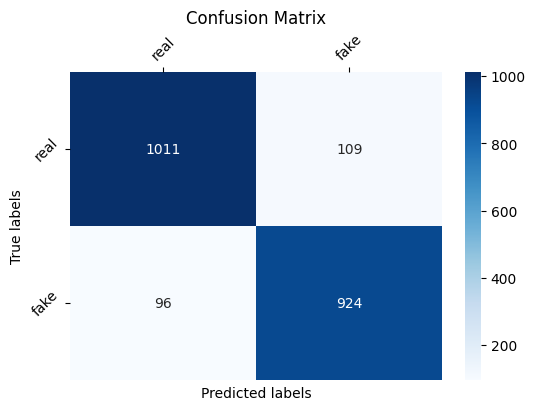

In [218]:
# Predicts the class labels for the test data using the trained CNN + BiLSTM model
predictions = np.argmax(CNN_BiLSTM.predict(test_data), axis = -1)
# evaluates the performance of a model (presumably an LSTM-based model) on a test dataset and
# Prints the confusion matrix, which provides a breakdown of true positive, true negative, false positive, and false negative counts.
cMat = confusion_matrix(test_labels, predictions)
print(f'Confusion Matrix:{cMat}\n')
print('Report : ')
print(cMat)
'''
Generates and visualizes a confusion matrix for a given model's predictions on a test dataset.
The code uses the confusion_matrix function from scikit-learn to compute the confusion matrix
and the seaborn library to create a heatmap visualization of the matrix.
'''
visualizer().generateConfusionMatrix((6,4), cMat, BinaryLabels().getClassLabels())
print('Over all model performance:')
# prints various classification metrics, including a confusion matrix and a summary report.
# Generating a pandas data frame using the data.

ACCURACY = round(accuracy_score(test_labels, predictions),4) * 100
RECALL = round(recall_score(test_labels, predictions, average='weighted'),4) * 100
PRECISION = round(precision_score(test_labels, predictions, average='weighted'),4) * 100
F1SCORE = round(f1_score(test_labels, predictions, average= 'weighted'),4) * 100

Results().update('CNN+BiLSTM', ACCURACY, RECALL, PRECISION, F1SCORE)

pd.DataFrame(
    {
        # Calculates the accuracy of the model by comparing the predicted labels with the true labels in the test dataset.
        'Accuracy':ACCURACY,
        # Calculates the precision of the model using a weighted average.
        'Precision': PRECISION,
        # Calculates the recall of the model using a weighted average.
        'Recall': RECALL,
        # Calculates the F1 score of the model using a weighted average. The F1 score is the harmonic mean of precision and recall.
        'F1 Score': F1SCORE
    },
      index = ['CNN + BiLSTM']
    )

##Prediction statistics

In [210]:
totalMiscalculatedValues = 0
correctClassification = 0
data = "NEWS,PREDICTION,LABEL\n"
for i in range(testingData.shape[0]):
  if(test_labels[i] != predictionClass[i]):
      totalMiscalculatedValues += 1
      data += testingData['tweet'][i]+","+BinaryLabels().getClassLabels()[predictionClass[i]].upper()+","+BinaryLabels().getClassLabels()[test_labels[i]].upper()+"\n"
  else:
    correctClassification += 1
file = open("MisclassifiedData.csv","w")
file.write(data)
file.close()

print("Mispredicted {:.2f} % of the data.\nYou can see the misclassified data in the file 'MisclassifiedData.csv'\nFaultless data prediction precentage : {:.2f} % ".format(((totalMiscalculatedValues / testingData.shape[0]) * 100), (correctClassification / testingData.shape[0]) * 100))


Mispredicted 9.58 % of the data.
You can see the misclassified data in the file 'MisclassifiedData.csv'
Faultless data prediction precentage : 90.42 % 


In [211]:
# Writing the data to the csv file named prediction
file = open('prediction.csv','w')
file.write("id,label\n")
for i in range(len(predictionClass)):
  file.write(f"{testingData['id'][i]},{BinaryLabels().getClassLabels()[predictionClass[i]]}\n")
file.close()
print('Done writing the data to the file!!')

Done writing the data to the file!!


## Proposed solution for better accuracy

In [272]:
architecture = {
    'countVectorizer' : ('vect', CountVectorizer()),
    'termFreq_Idf' : ('tfidf', TfidfTransformer()),
    'linearSVC' : ('clf', LinearSVC(dual=False))
}

line = []
line.append(architecture['countVectorizer'])
line.append(architecture['termFreq_Idf'])
line.append(architecture['linearSVC'])

pLine = Pipeline(line)

In [273]:
pLine.fit([doc for doc in trainingData['cleaned']], training_labels)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC(dual=False))])

In [274]:
from sklearn import metrics
predicted = pLine.predict([doc for doc in testingData['cleaned']])
print(metrics.classification_report(test_labels, predicted))

ACCURACY = (round(accuracy_score(test_labels, predicted),4) * 100)
PRECISION = (round(precision_score(test_labels, predicted, average='weighted'), 4) * 100)
RECALL = (round(recall_score(test_labels, predicted, average='weighted'), 4) * 100)
F1SCORE = (round(f1_score(test_labels, predicted, average='weighted'), 4) * 100)
Results().update('cVec+Tfidf+lSVC', ACCURACY, RECALL, PRECISION, F1SCORE)

pd.DataFrame(
    {
        # Calculates the accuracy of the model by comparing the predicted labels with the true labels in the test dataset.
        'Accuracy':ACCURACY,
        # Calculates the precision of the model using a weighted average.
        'Precision': PRECISION,
        # Calculates the recall of the model using a weighted average.
        'Recall': RECALL,
        # Calculates the F1 score of the model using a weighted average. The F1 score is the harmonic mean of precision and recall.
        'F1 Score': F1SCORE
    },
      index = ['cVec+Tfidf+lSVC']
    )

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1120
           1       0.91      0.93      0.92      1020

    accuracy                           0.92      2140
   macro avg       0.92      0.92      0.92      2140
weighted avg       0.92      0.92      0.92      2140



,Accuracy,Precision,Recall,F1 Score
cVec+Tfidf+lSVC,92.43,92.44,92.43,92.43


In [268]:
predicted = pLine.predict([doc for doc in testingData['cleaned']])
classes = []
for P in predicted:
  classes.append('real' if P == 0 else 'fake')
df = pd.DataFrame(classes)
testingData['p_label'] = df
trueLabels = testingData['label']
predictedLabels = testingData['p_label']
i = 0
error = 0
for i in range(len(trueLabels)):
  if trueLabels[i] != predictedLabels[i]:
    error += 1
print(f'{error} flase predictions\n{(error/len(trueLabels))*100} % of errors produced')

162 flase predictions
7.570093457943925 % of errors produced


Confusion Matrix:
[[1031   89]
 [  73  947]]



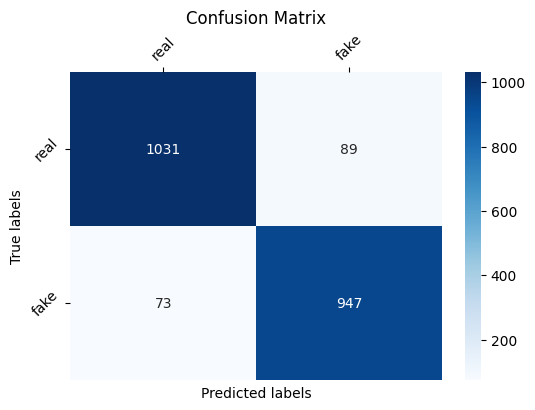

In [271]:
cMat = confusion_matrix(test_labels, predicted)
print(f'Confusion Matrix:\n{cMat}\n')
visualizer().generateConfusionMatrix((6,4), cMat, BinaryLabels().getClassLabels())

##Existing systems (LSTM)

In [225]:
def save():
    file = "LSTM_Model.h5"
    save = keras.callbacks.ModelCheckpoint(file, monitor='val_accuracy', verbose=2, save_best_only=True, save_weights_only=False, mode='max')
    return save

def generateLSTM():
  LAYERS = {
      'Embedding': keras.layers.Embedding(dataSpec().maxWordLen(), 50, input_length = dataSpec().paddingLength()),
      'LSTM' : keras.layers.LSTM(64, dropout=0.15),
      'Flatten' : keras.layers.Flatten(),
      'Dense' : keras.layers.Dense(len(BinaryLabels().getClassLabels()), activation = 'softmax')
  }
  keras.backend.clear_session()
  model = keras.models.Sequential([LAYERS['Embedding'], LAYERS['LSTM'], LAYERS['Flatten'], LAYERS['Dense']])
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
  model.summary()
  return model

LSTM = generateLSTM()
_LSTM_ = LSTM.fit(training_data, training_labels, epochs = 100, batch_size = 128, verbose = 1, validation_split = 0.2, callbacks = [Training().callBack(), save(), Training().tensorBoard()])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            500000    
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 2)                 130       
                                                                 
Total params: 529570 (2.02 MB)
Trainable params: 529570 (2.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/100
41/41 [==============================] - ETA: 0s -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/41 [==============================] - 8s 117ms/step - loss: 0.6925 - accuracy: 0.5238 - val_loss: 0.6921 - val_accuracy: 0.5156
Epoch 2/100
41/41 [==============================] - ETA: 0s - loss: 0.4612 - accuracy: 0.7886
Epoch 2: val_accuracy improved from 0.51558 to 0.88551, saving model to LSTM_Model.h5
41/41 [==============================] - 3s 76ms/step - loss: 0.4612 - accuracy: 0.7886 - val_loss: 0.3130 - val_accuracy: 0.8855
Epoch 3/100
41/41 [==============================] - ETA: 0s - loss: 0.1856 - accuracy: 0.9383
Epoch 3: val_accuracy improved from 0.88551 to 0.91589, saving model to LSTM_Model.h5
41/41 [==============================] - 4s 97ms/step - loss: 0.1856 - accuracy: 0.9383 - val_loss: 0.2077 - val_accuracy: 0.9159
Epoch 4/100
41/41 [==============================] - ETA: 0s - loss: 0.0699 - accuracy: 0.9782
Epoch 4: val_accuracy improved from 0.91589 to 0.92056, saving model to LSTM_Model.h5
41/41 [==============================] - 3s 79ms/step - loss: 0.06

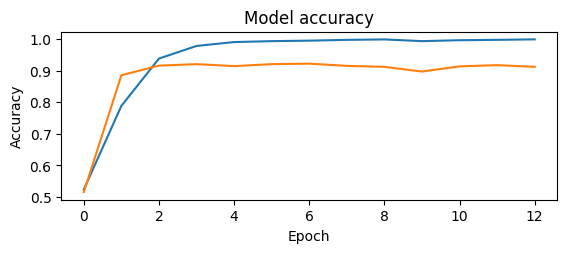

In [226]:
# LSMT model accuacy graph.
plt.subplot(2, 1, 1)
plt.plot(_LSTM_.history['accuracy'])
plt.plot(_LSTM_.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [227]:
loss, accuracy = LSTM.evaluate(test_data, test_labels)
print('\nLOSS   \t\t: '+ str(loss)+'\nACCURACY \t: '+ str(accuracy)+'\n')

67/67 [==============================] - 0s 4ms/step - loss: 0.5873 - accuracy: 0.9028

LOSS   		: 0.5872672200202942
ACCURACY 	: 0.9028037190437317



67/67 [==============================] - 1s 4ms/step
Confusion Matrix:[[1040   80]
 [ 128  892]]

Report : 
[[1040   80]
 [ 128  892]]
Over all model performance:


,Accuracy,Precision,Recall,F1 Score
LSTM,90.28,90.34,90.28,90.27


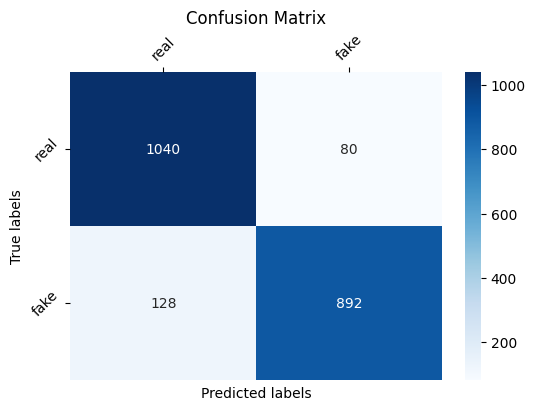

In [228]:
# Predicts the class labels for the test data using the trained LSTM model
predictions = np.argmax(LSTM.predict(test_data), axis = -1)
# evaluates the performance of a model (presumably an LSTM-based model) on a test dataset and
# Prints the confusion matrix, which provides a breakdown of true positive, true negative, false positive, and false negative counts.
cMat = confusion_matrix(test_labels, predictions)
print(f'Confusion Matrix:{cMat}\n')
print('Report : ')
print(cMat)
'''
Generates and visualizes a confusion matrix for a given model's predictions on a test dataset.
The code uses the confusion_matrix function from scikit-learn to compute the confusion matrix
and the seaborn library to create a heatmap visualization of the matrix.
'''
visualizer().generateConfusionMatrix((6,4), cMat, BinaryLabels().getClassLabels())
print('Over all model performance:')
# prints various classification metrics, including a confusion matrix and a summary report.
# Generating a pandas data frame using the data.

ACCURACY = round(accuracy_score(test_labels, predictions),4) * 100
RECALL = round(recall_score(test_labels, predictions, average='weighted'),4) * 100
PRECISION = round(precision_score(test_labels, predictions, average='weighted'),4) * 100
F1SCORE = round(f1_score(test_labels, predictions, average= 'weighted'),4) * 100

Results().update('LSTM', ACCURACY, RECALL, PRECISION, F1SCORE)

pd.DataFrame(
    {
        # Calculates the accuracy of the model by comparing the predicted labels with the true labels in the test dataset.
        'Accuracy':ACCURACY,
        # Calculates the precision of the model using a weighted average.
        'Precision': PRECISION,
        # Calculates the recall of the model using a weighted average.
        'Recall': RECALL,
        # Calculates the F1 score of the model using a weighted average. The F1 score is the harmonic mean of precision and recall.
        'F1 Score': F1SCORE
    },
      index = ['LSTM']
    )

#Comparing the propesed solution with Machine & Deep Learning Models.


In [231]:
'''
TfidfVectorizer Parameters:
ngram_range=(1, 3): Specifies that the vectorizer should consider unigrams, bigrams, and trigrams.
It generates features for each of these n-gram combinations.
min_df=5: Ignores terms that have a document frequency strictly lower than 5.
This parameter helps filter out terms that occur in very few documents.
tokenizer=lambda data: data.split(): Defines a custom tokenizer that splits the input data into individual tokens.
In this case, it tokenizes the data by splitting on whitespace.
max_features=20000: Limits the number of features (terms) to the top 20,000 most frequent terms in the corpus.
This helps control the dimensionality of the feature space.
use_idf=True: Enables the use of Inverse Document Frequency (IDF) reweighting.
This adjusts the importance of terms based on how often they appear across the entire corpus.
fit_transform: Applies the TfidfVectorizer to the trainingData.cleaned text data.
This results in a sparse matrix (corpus) where each row corresponds to a document in the training dataset,
and each column corresponds to a unique term (unigram, bigram, or trigram).
labels = trainingData.TRAINING_LABEL:
Assigns the labels (target variable) from the training dataset to the variable labels.
This assumes that trainingData.TRAINING_LABEL contains the class labels corresponding to each document in trainingData.cleaned.
'''
TrainingFeed = TfidfVectorizer(ngram_range=(1,3), min_df = 5, tokenizer = lambda data: data.split(), max_features=dataSpec().maxWordLen(), use_idf = True).fit_transform(trainingData.cleaned)
X_train, X_test, Y_train, Y_test = train_test_split(TrainingFeed, trainingData.TRAINING_LABEL, train_size = 0.8, test_size = 0.2, random_state = 0)
# 80% for training the data and 20% for testing the data.
print(X_train.shape, X_test.shape)

(5136, 4900) (1284, 4900)


In [232]:
%%time
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


class multinominalNaiveBayes:
  def mnNaiveBayes(self, **kwargs):
    alpha = kwargs['alpha']
    return MultinomialNB(alpha = alpha)

class decisionTree:
  def decTree(self, **kwargs):
    criterion = kwargs['criterion']
    state = kwargs['rState']
    return DecisionTreeClassifier(criterion = criterion, random_state = state)

class randomForestClassifier:
  def ranForest(self, **kwargs):
    n_estimators = kwargs['n_estimators']
    criterion = kwargs['criterion']
    random_state = kwargs['random_state']
    return RandomForestClassifier(n_estimators = n_estimators, criterion = criterion, random_state = random_state)

class logisticRegression:
  def logReg(self, **kwargs):
    state = kwargs['State']
    C = kwargs['C']
    return LogisticRegression(random_state = state, C = C)

class Trainer:
  def train(self, model, X_train, Y_train):
    model.fit(X_train, Y_train)
    return model

CPU times: user 88 µs, sys: 0 ns, total: 88 µs
Wall time: 92 µs


------------------------------------------------------------
Classifier:  Logistic Regression
Confusion Matrix:
 [[584  73]
 [ 96 531]]
REPORT : 
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       657
           1       0.88      0.85      0.86       627

    accuracy                           0.87      1284
   macro avg       0.87      0.87      0.87      1284
weighted avg       0.87      0.87      0.87      1284



,Accuracy,Precision,Recall,f1Score
Logistic Regression,86.84,86.87,86.84,86.83


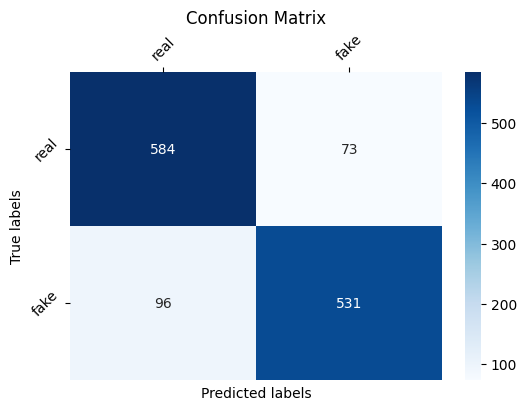

In [233]:
# Comparing the logistic regression model with the CNN + BiLSTM
ml = MachineLearning()
model = logisticRegression().logReg(State = 215, C = 0.08)
trainedModel = Trainer().train(model, X_train, Y_train)
modelName = 'Logistic Regression'
ml.efficiency(trainedModel, X_test, Y_test, modelName)
pd.DataFrame(Results().performance[str(modelName)], index = ['Logistic Regression'])

------------------------------------------------------------
Classifier:  Decision Tree
Confusion Matrix:
 [[544 113]
 [131 496]]
REPORT : 
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       657
           1       0.81      0.79      0.80       627

    accuracy                           0.81      1284
   macro avg       0.81      0.81      0.81      1284
weighted avg       0.81      0.81      0.81      1284



,Accuracy,Precision,Recall,f1Score
Decision Tree,81.0,81.01,81.0,80.99


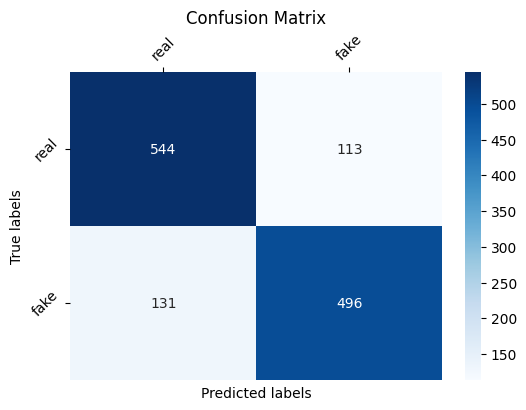

In [234]:
# Comparing the decision tree classifier model with the CNN + BiLSTM
ml = MachineLearning()
model = decisionTree().decTree(criterion = 'entropy', rState = 0)
trainedModel = Trainer().train(model, X_train, Y_train)
modelName = 'Decision Tree'
ml.efficiency(trainedModel, X_test, Y_test, modelName)
pd.DataFrame(Results().performance[str(modelName)], index = ['Decision Tree'])

------------------------------------------------------------
Classifier:  Random Forest
Confusion Matrix:
 [[576  81]
 [ 95 532]]
REPORT : 
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       657
           1       0.87      0.85      0.86       627

    accuracy                           0.86      1284
   macro avg       0.86      0.86      0.86      1284
weighted avg       0.86      0.86      0.86      1284



,Accuracy,Precision,Recall,f1Score
Random Forest,86.29,86.3,86.29,86.29


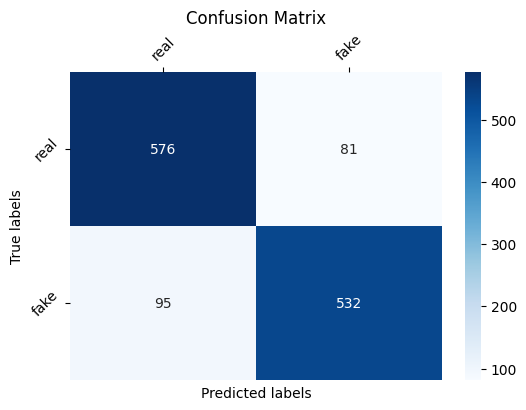

In [235]:
# Comparing the random forest classifier model with the CNN + BiLSTM
ml = MachineLearning()
model = randomForestClassifier().ranForest(n_estimators=10, criterion ='entropy', random_state = 0)
trainedModel = Trainer().train(model, X_train, Y_train)
modelName = 'Random Forest'
ml.efficiency(trainedModel, X_test, Y_test, modelName)
pd.DataFrame(Results().performance[str(modelName)], index = ['Random Forest'])

------------------------------------------------------------
Classifier:  Naive Bayes
Confusion Matrix:
 [[577  80]
 [ 57 570]]
REPORT : 
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       657
           1       0.88      0.91      0.89       627

    accuracy                           0.89      1284
   macro avg       0.89      0.89      0.89      1284
weighted avg       0.89      0.89      0.89      1284



,Accuracy,Precision,Recall,f1Score
Naive Bayes,89.33,89.39,89.33,89.33


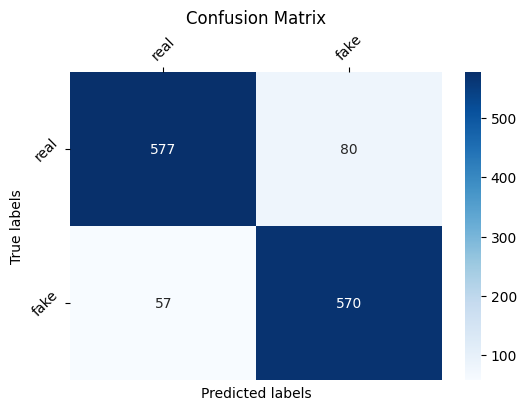

In [236]:
# Comparing the multinomial naive bayes model with the CNN + BiLSTM
ml = MachineLearning()
model = multinominalNaiveBayes().mnNaiveBayes(alpha=0.05)
trainedModel = Trainer().train(model, X_train, Y_train)
modelName = 'Naive Bayes'
ml.efficiency(trainedModel, X_test, Y_test, modelName)
pd.DataFrame(Results().performance[str(modelName)], index = ['Naive Bayes'])

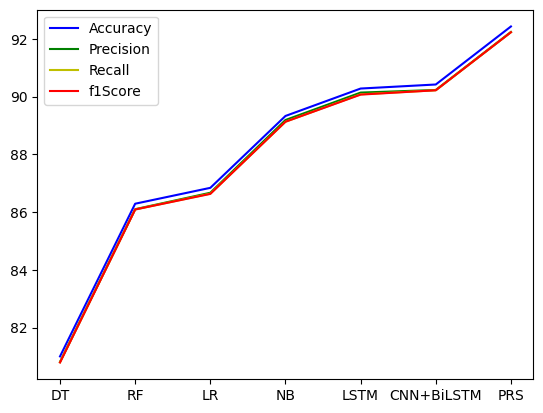

In [241]:
# Comparing the performance of our model (CNN + BiLSTM) with other machine learning models.

data = Results().performance

visualizer().generateCmpGraph(['DT', 'RF', 'LR', 'NB', 'LSTM', 'CNN+BiLSTM', 'PRS'],
                               list(data['CNN+BiLSTM'].keys()),
                                [data['Decision Tree']['Accuracy'], data['Random Forest']['Accuracy'],
                                 data['Logistic Regression']['Accuracy'],data['Naive Bayes']['Accuracy'],
                                 data['LSTM']['Accuracy'], data['CNN+BiLSTM']['Accuracy'], data['cVec+Tfidf+lSVC']['Accuracy']],

                                [data['Decision Tree']['Precision'], data['Random Forest']['Precision'],
                                 data['Logistic Regression']['Precision'],data['Naive Bayes']['Precision'],
                                 data['LSTM']['Precision'], data['CNN+BiLSTM']['Precision'], data['cVec+Tfidf+lSVC']['Precision']],

                                [data['Decision Tree']['Recall'], data['Random Forest']['Recall'],
                                 data['Logistic Regression']['Recall'],data['Naive Bayes']['Recall'],
                                 data['LSTM']['Recall'], data['CNN+BiLSTM']['Recall'], data['cVec+Tfidf+lSVC']['Recall']],

                                [data['Decision Tree']['f1Score'], data['Random Forest']['f1Score'],
                                 data['Logistic Regression']['f1Score'],data['Naive Bayes']['f1Score'],
                                 data['LSTM']['f1Score'], data['CNN+BiLSTM']['f1Score'], data['cVec+Tfidf+lSVC']['f1Score']],
                                dropout = 0.2)


##MSMHNSM Validation

In [242]:
# I have re-created the data set by adding some labeled news to the validation data set from both the testing and training data set.
validationData = pd.read_excel("/content/NewsValidationDataSet.xlsx").sample(frac = 1)
print(f"Magnitude of the validation data : {validationData.shape[0]} rows & {validationData.shape[1]} cols")
validationData['VALIDATION_LABEL'] = validationData.label.replace({'real':0,'fake':1})
validationData.head(5)

Magnitude of the validation data : 6420 rows & 3 cols


,id,tweet,label,VALIDATION_LABEL
324,325,"Canada’s top BDSM doctor says wear a mask, lea...",fake,1
1340,1341,There are 3 cases considered to have recovered...,real,0
6025,6026,Heard about contact tracing but not sure what ...,real,0
2077,2078,India records its highest single-day increase ...,fake,1
381,382,Researchers warned of a ticking coronavirus ti...,real,0


In [243]:
validationData.tail(5)

,id,tweet,label,VALIDATION_LABEL
3772,3773,People who are sick with coronavirus continue ...,fake,1
5191,5192,Madagascar was COVID-19 free on April 28 after...,fake,1
5226,5227,In the third week WHO identified &amp; began c...,real,0
5390,5391,NEWS! Smokers can’t wait for pubs to reopen so...,fake,1
860,861,@pronxt @MoHFW_INDIA As per GoI for #COVID19 c...,real,0


In [244]:
validationData['cleaned'] = validationData['tweet'].apply(dataPreprocessor().dataCleansing)
validationData.head(5)

,id,tweet,label,VALIDATION_LABEL,cleaned
324,325,"Canada’s top BDSM doctor says wear a mask, lea...",fake,1,canada top bdsm doctor say wear mask leash tig...
1340,1341,There are 3 cases considered to have recovered...,real,0,3 considered recovered total number active 23 ...
6025,6026,Heard about contact tracing but not sure what ...,real,0,heard contact tracing sure used health departm...
2077,2078,India records its highest single-day increase ...,fake,1,india record highest singleday increase 16000 ...
381,382,Researchers warned of a ticking coronavirus ti...,real,0,researcher warned ticking time bomb 2007 via u...


In [245]:
validationData.tail(5)

,id,tweet,label,VALIDATION_LABEL,cleaned
3772,3773,People who are sick with coronavirus continue ...,fake,1,people sick continue injected sea water many s...
5191,5192,Madagascar was COVID-19 free on April 28 after...,fake,1,madagascar free april 28 registering 100 recov...
5226,5227,In the third week WHO identified &amp; began c...,real,0,third week identified amp began contracting va...
5390,5391,NEWS! Smokers can’t wait for pubs to reopen so...,fake,1,news smoker cant wait pub reopen spend night s...
860,861,@pronxt @MoHFW_INDIA As per GoI for #COVID19 c...,real,0,pronxt mohfwindia per goi homeisolation dip ox...


In [246]:
validation_data, validation_labels, tokenizer = encode(trainingData.cleaned, trainingData.TRAINING_LABEL, dataSpec().maxWordLen(), dataSpec().paddingLength())

Analysis of the information provided by the Tokenizer

TERM FREQUENCY : ['new : 1090', 'test : 948', 'state : 924', 'death : 810', 'people : 753', 'number : 701', 'total : 545', 'confirmed : 515', 'india : 514', 'day : 493']
WORD DOCUMENT FREQ : ['new : 913', 'state : 731', 'test : 665', 'death : 650', 'people : 641', 'number : 551', 'total : 460', 'india : 441', 'day : 415', 'confirmed : 412']
WORD INDEXES : ['infertility : 15227', 'dargah : 15226', 'intubate : 15225', 'repandybiggsaz : 15224', 'rickleventhal : 15223', 'ashley : 15222', 'charliekirk11 : 15221', 'daveman19802 : 15220', 'kagashley : 15219', 'reserved : 15218']
TOTAL DOCS : 6420

Encoded Sequences
Found 15227 unique tokens
-------------------------
act    	: 359
found    	: 168
average    	: 116
person    	: 122
illinois    	: 1390
infecting    	: 1391
111    	: 1981
people    	: 5
data    	: 29
show    	: 33
infection    	: 68
growth    	: 1392
rate    	: 30
declined    	: 1300
time    	: 35
factor    	: 1023
stayathome

In [247]:
print('Validation Data: ')
print(validation_data)
print('\nValidation Labels:')
print(validation_labels)

Validation Data: 
[[  63  192   15 ...    0    0    0]
 [   3   11 6717 ...    0    0    0]
 [4604 1637  183 ...    0    0    0]
 ...
 [ 106   34   17 ...    0    0    0]
 [2639  846 2527 ...    0    0    0]
 [2093   10   67 ...    0    0    0]]

Validation Labels:
0       0
1       0
2       1
3       0
4       0
       ..
6415    1
6416    1
6417    1
6418    1
6419    0
Name: TRAINING_LABEL, Length: 6420, dtype: int64


In [248]:
CNN_BiLSTM = tf.keras.models.load_model('/content/CNNBiLSMT_Model.h5')
loss, accuracy = CNN_BiLSTM.evaluate(validation_data, validation_labels)
print('\nLOSS   \t\t: '+ str(loss)+'\nACCURACY \t: '+ str(accuracy)+'\n')
probability = CNN_BiLSTM.predict(validation_data)
predictionClass = np.argmax(probability, axis = -1)
totalMiscalculatedValues = 0
correctClassification = 0
for i in range(validationData.shape[0]):
  if(validation_labels[i] != predictionClass[i]):
      totalMiscalculatedValues += 1
  else:
    correctClassification += 1

print("Mispredicted {:.2f} % of the data.\nFaultless data prediction precentage : {:.2f} % ".format(((totalMiscalculatedValues / validationData.shape[0]) * 100), (correctClassification / validationData.shape[0]) * 100))


201/201 [==============================] - 2s 5ms/step - loss: 0.0625 - accuracy: 0.9815

LOSS   		: 0.06248224154114723
ACCURACY 	: 0.981464147567749

201/201 [==============================] - 2s 4ms/step
Mispredicted 1.85 % of the data.
Faultless data prediction precentage : 98.15 % 
